In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
pd.set_option("display.max_columns", None)

In [6]:
sns.set_style("whitegrid")

In [11]:
df = pd.read_csv("german_credit_data.csv")

In [12]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [13]:
df["Age"].describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Age, dtype: float64

In [16]:
df["Risk"].value_counts()

Risk
good    700
bad     300
Name: count, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [18]:
df = df.dropna().reset_index(drop=True)

In [19]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
1,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
2,4,53,male,2,free,little,little,4870,24,car,bad
3,7,35,male,3,rent,little,moderate,6948,36,car,good
4,9,28,male,3,own,little,moderate,5234,30,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
517,989,48,male,1,own,little,moderate,1743,24,radio/TV,good
518,993,30,male,3,own,little,little,3959,36,furniture/equipment,good
519,996,40,male,3,own,little,little,3857,30,car,good
520,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [21]:
df.drop(columns = 'Unnamed: 0', inplace = True)
df.head()
df.info()
df.describe()
df.isnull().sum()
df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               522 non-null    int64 
 1   Sex               522 non-null    object
 2   Job               522 non-null    int64 
 3   Housing           522 non-null    object
 4   Saving accounts   522 non-null    object
 5   Checking account  522 non-null    object
 6   Credit amount     522 non-null    int64 
 7   Duration          522 non-null    int64 
 8   Purpose           522 non-null    object
 9   Risk              522 non-null    object
dtypes: int64(4), object(6)
memory usage: 40.9+ KB


np.int64(0)

In [22]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [23]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,22,female,2,own,little,moderate,5951,48,radio/TV,bad
1,45,male,2,free,little,little,7882,42,furniture/equipment,good
2,53,male,2,free,little,little,4870,24,car,bad
3,35,male,3,rent,little,moderate,6948,36,car,good
4,28,male,3,own,little,moderate,5234,30,car,bad
...,...,...,...,...,...,...,...,...,...,...
517,48,male,1,own,little,moderate,1743,24,radio/TV,good
518,30,male,3,own,little,little,3959,36,furniture/equipment,good
519,40,male,3,own,little,little,3857,30,car,good
520,23,male,2,free,little,little,1845,45,radio/TV,bad


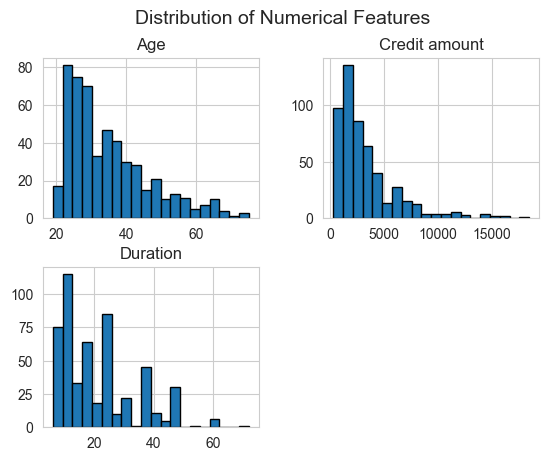

In [27]:
df[["Age", "Credit amount", "Duration"]].hist(bins = 20, edgecolor = "black")
plt.suptitle("Distribution of Numerical Features", fontsize = 14)
plt.show()

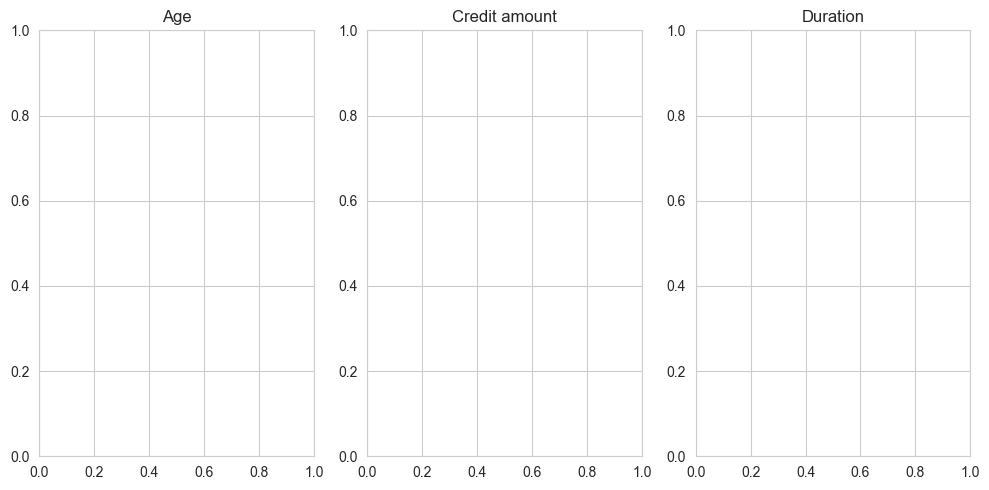

In [34]:
plt.figure(figsize= ( 10,5))
for i, col in enumerate(["Age", "Credit amount", "Duration"]):
    plt.subplot(1, 3, i+1)
    sns.boxplot(Y = df[col], color = "red")
    plt.title(col)

plt.tight_layout()   
plt.show()


In [33]:
df.query("Duration > 70")

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
358,24,male,2,own,moderate,moderate,5595,72,radio/TV,bad


In [35]:
categorical_cols = ["Sex", "Job", "Housing", "Saving accounts", "Checking account", "Purpose"]

C:\Users\rajee\AppData\Local\Temp\ipykernel_8276\2340960146.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df, x  = col , palette = "Set2", order = df[col].value_counts().index)
C:\Users\rajee\AppData\Local\Temp\ipykernel_8276\2340960146.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df, x  = col , palette = "Set2", order = df[col].value_counts().index)
C:\Users\rajee\AppData\Local\Temp\ipykernel_8276\2340960146.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df, x  = col , palette = "Set2", order = df[c

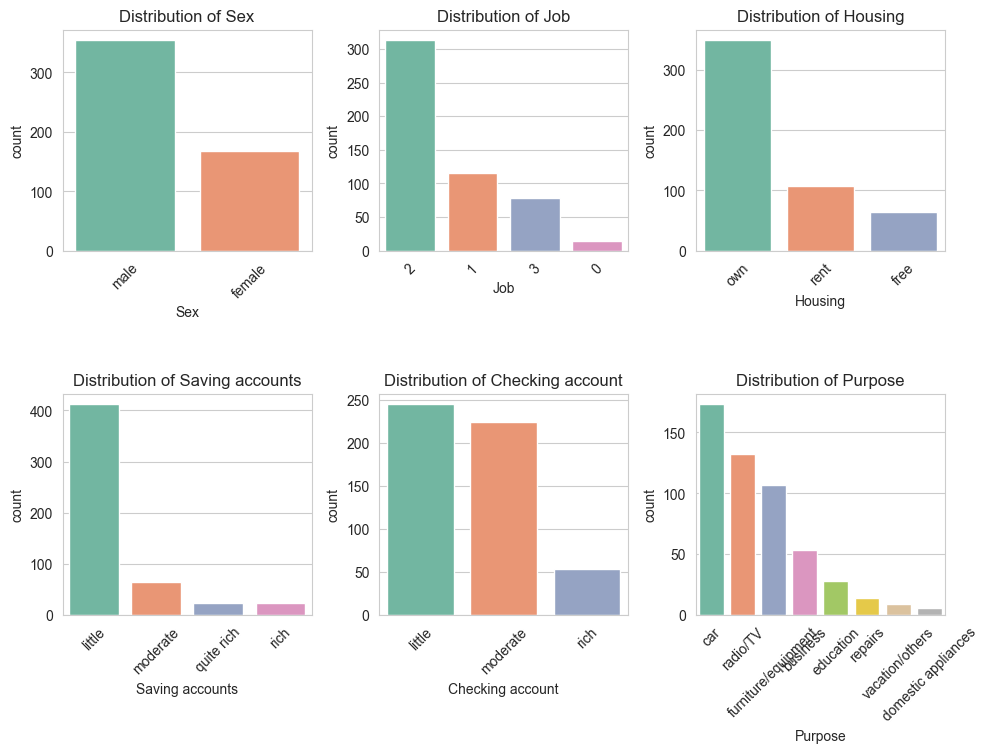

In [41]:
plt.figure(figsize= (10, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i +1)
    sns.countplot(data= df, x  = col , palette = "Set2", order = df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [45]:
corr = df [["Age","Job", "Credit amount", "Duration"]].corr()

In [46]:
corr

,Age,Job,Credit amount,Duration
Age,1.000000,0.039771,0.082014,0.001549
Job,0.039771,1.000000,0.334721,0.200794
Credit amount,0.082014,0.334721,1.000000,0.613298
Duration,0.001549,0.200794,0.613298,1.000000


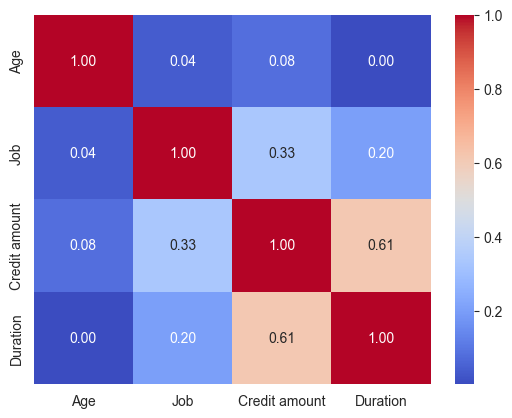

In [47]:
sns.heatmap(corr, annot = True, cmap = "coolwarm", fmt = ".2f")
plt.show()

In [48]:
df.groupby("Job")["Credit amount"].mean()

Job
0    1767.857143
1    2250.715517
2    3129.130990
3    5648.784810
Name: Credit amount, dtype: float64

In [49]:
df.groupby("Sex")["Credit amount"].mean()

Sex
female    2937.202381
male      3440.833333
Name: Credit amount, dtype: float64

In [50]:
pd.pivot_table(df, values= "Credit amount", index = "Housing", columns = "Purpose")

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Housing,,,,,,,,
free,4705.000000,5180.314286,NaN,5314.250000,4419.444444,2097.000000,1190.0,7842.666667
own,3725.973684,3120.485437,1333.5,2625.076923,3031.100000,2307.613861,2993.5,10321.833333
rent,6180.833333,3398.285714,NaN,2627.857143,2890.285714,2138.000000,2384.0,NaN


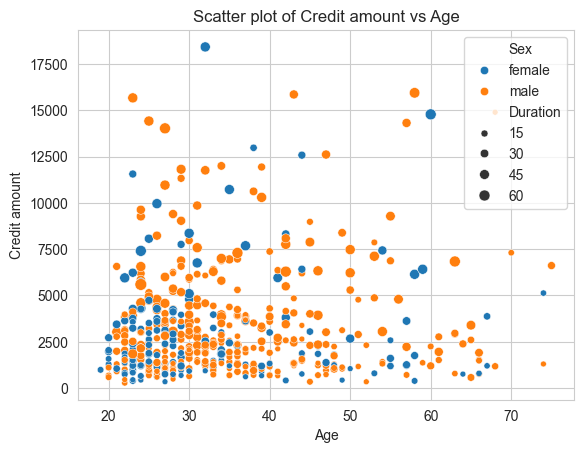

In [51]:
sns.scatterplot(data = df, x = "Age", y = "Credit amount", hue = "Sex", size = "Duration")
plt.title("Scatter plot of Credit amount vs Age")
plt.show()

C:\Users\rajee\AppData\Local\Temp\ipykernel_8276\443700494.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data = df, x = "Saving accounts", y = "Credit amount", palette = "Pastel1")


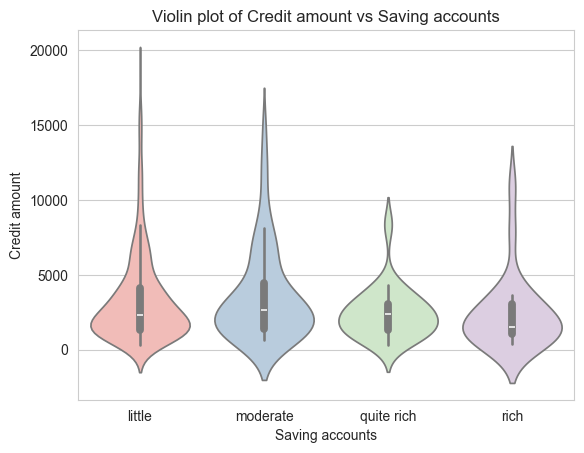

In [52]:
sns.violinplot(data = df, x = "Saving accounts", y = "Credit amount", palette = "Pastel1")
plt.title("Violin plot of Credit amount vs Saving accounts")
plt.show()

In [55]:
df["Risk"].value_counts(normalize = True) * 100

Risk
good    55.747126
bad     44.252874
Name: proportion, dtype: float64

C:\Users\rajee\AppData\Local\Temp\ipykernel_8276\3075768475.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = "Risk", y = col, palette = "Pastel2")
C:\Users\rajee\AppData\Local\Temp\ipykernel_8276\3075768475.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = "Risk", y = col, palette = "Pastel2")
C:\Users\rajee\AppData\Local\Temp\ipykernel_8276\3075768475.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = "Risk", y = col, palette = "Pastel2")


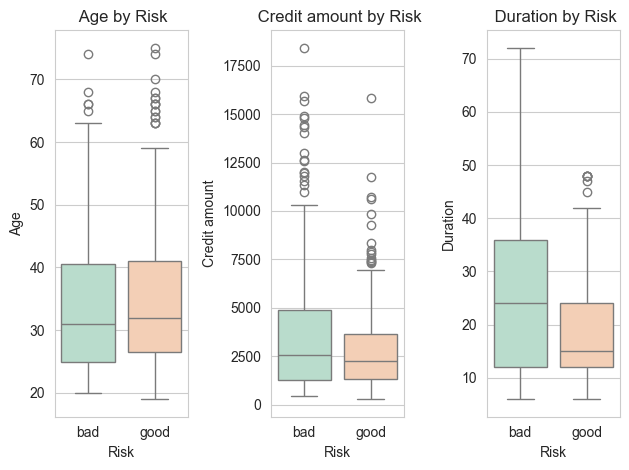

In [58]:
for i, col in enumerate(["Age", "Credit amount", "Duration"]):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data = df, x = "Risk", y = col, palette = "Pastel2")
    plt.title(f" {col} by Risk")
    
plt.tight_layout()
plt.show()


In [63]:
df.groupby("Risk")[["Credit amount","Age","Duration"]].mean()

,Credit amount,Age,Duration
Risk,,,
bad,3881.090909,34.147186,25.445887
good,2800.594502,35.477663,18.079038


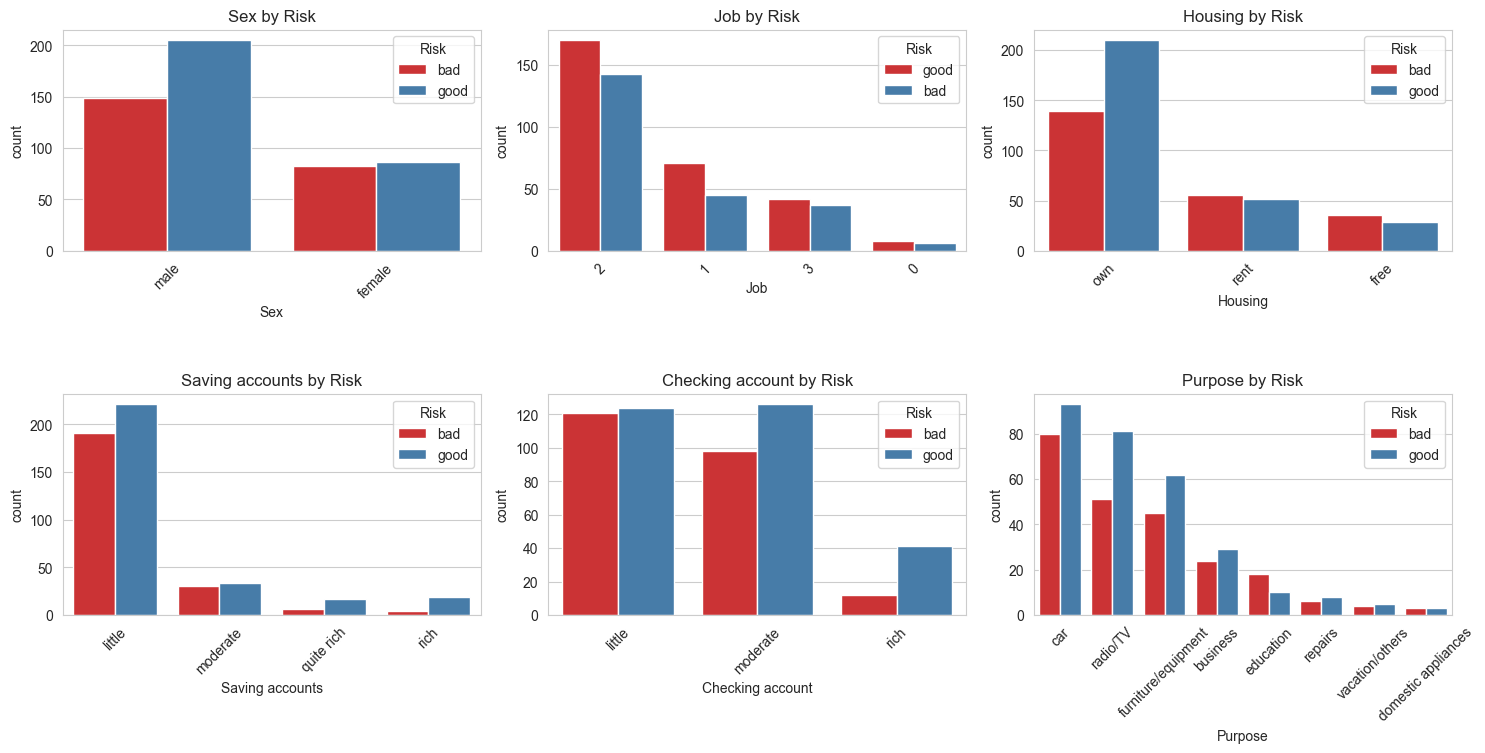

In [69]:
plt.figure(figsize= (15, 10))
for i , col in enumerate(categorical_cols):
    plt.subplot(3, 3, i+1)
    sns.countplot(data = df, x = col, hue = "Risk", palette = "Set1", order = df[col].value_counts().index)
    plt.title(f"{col} by Risk")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



In [70]:
features = ["Age", "Sex", "Job", "Housing", "Saving accounts", "Checking account", "Credit amount", "Duration", "Purpose"]

In [71]:
target = "Risk"

In [72]:
df_model = df[features + [target]].copy()

In [73]:
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,22,female,2,own,little,moderate,5951,48,radio/TV,bad
1,45,male,2,free,little,little,7882,42,furniture/equipment,good
2,53,male,2,free,little,little,4870,24,car,bad
3,35,male,3,rent,little,moderate,6948,36,car,good
4,28,male,3,own,little,moderate,5234,30,car,bad


In [77]:
from sklearn.preprocessing import LabelEncoder
import joblib







In [78]:
cat_cols = df_model.select_dtypes(include = ["object"]).columns.drop("Risk")



In [79]:
le_dict = {}

In [80]:
cat_cols

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose'], dtype='object')

In [82]:
for col in cat_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    le_dict[col] = le
    joblib.dump(le, f"{col}_encoder.pkl")

In [83]:
le_target = LabelEncoder()

In [84]:
target

'Risk'

In [85]:
df_model[target] = le_target.fit_transform(df_model[target])

In [86]:
df_model[target].value_counts()

Risk
1    291
0    231
Name: count, dtype: int64

In [87]:
joblib.dump(le_target, "target_encoder.pkl")

['target_encoder.pkl']

In [89]:
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,22,0,2,1,0,1,5951,48,5,0
1,45,1,2,0,0,0,7882,42,4,1
2,53,1,2,0,0,0,4870,24,1,0
3,35,1,3,2,0,1,6948,36,1,1
4,28,1,3,1,0,1,5234,30,1,0


In [90]:
from sklearn.model_selection import train_test_split

In [91]:
x= df_model.drop(target, axis = 1)

In [92]:
y = df_model[target]

In [93]:
x

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,22,0,2,1,0,1,5951,48,5
1,45,1,2,0,0,0,7882,42,4
2,53,1,2,0,0,0,4870,24,1
3,35,1,3,2,0,1,6948,36,1
4,28,1,3,1,0,1,5234,30,1
...,...,...,...,...,...,...,...,...,...
517,48,1,1,1,0,1,1743,24,5
518,30,1,3,1,0,0,3959,36,4
519,40,1,3,1,0,0,3857,30,1
520,23,1,2,0,0,0,1845,45,5


In [94]:
target

'Risk'

In [95]:
y

0      0
1      1
2      0
3      1
4      0
      ..
517    1
518    1
519    1
520    0
521    1
Name: Risk, Length: 522, dtype: int64

In [96]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [97]:
X_train.shape

(417, 9)

In [104]:
X_test.shape

(105, 9)

In [105]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [107]:
def train_model(model, param_grid, X_train, y_train, X_test, y_test):
    grid = GridSearchCV( model, param_grid = param_grid, cv = 5, scoring = "accuracy", n_jobs = -1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return best_model, acc, grid.best_params_

In [109]:
dt = DecisionTreeClassifier(random_state = 1, class_weight = "balanced")
dt_param_grid = {
    "max_depth": [3, 5, 7 , 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

In [110]:
best_dt, acc_dt, dt_params = train_model(dt, dt_param_grid, X_train, y_train, X_test, y_test)


In [111]:
print("Decision Tree Accuracy: ", acc_dt)

Decision Tree Accuracy:  0.5428571428571428


In [112]:
print("Best Parameters: ", dt_params)

Best Parameters:  {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [113]:
rf = RandomForestClassifier(random_state = 1, class_weight = "balanced", n_jobs = -1)

In [114]:
rf_param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [5, 7,10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}


In [115]:
best_rf , acc_rf, rf_params = train_model(rf, rf_param_grid, X_train, y_train, X_test, y_test)

In [116]:
print("Random Forest Accuracy: ", acc_rf)

Random Forest Accuracy:  0.6


In [117]:
print("Best Parameters: ", rf_params)

Best Parameters:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [118]:
et = ExtraTreesClassifier(random_state = 1, class_weight = "balanced", n_jobs = -1)
et_param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [5, 7, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

In [119]:
best_et, acc_et, et_params = train_model(et, et_param_grid, X_train, y_train, X_test, y_test)

In [120]:
print("Extra Trees Accuracy: ", acc_et)

Extra Trees Accuracy:  0.5333333333333333


In [123]:
xgb = XGBClassifier(random_state = 1, scale_pos_weight = (y_train == 1).sum() / (y_train == 1).sum(), use_label_encoder = False, eval_metric = "logloss")

xgb_param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [3,5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}
best_xgb, acc_xgb, xgb_params = train_model(xgb, xgb_param_grid, X_train, y_train, X_test, y_test)
print("XGBoost Accuracy: ", acc_xgb)
print("Best Parameters: ", xgb_params)




XGBoost Accuracy:  0.6
Best Parameters:  {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}


c:\Python10\lib\site-packages\xgboost\training.py:199: UserWarning: [02:43:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [124]:
best_et.predict(X_test)

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0])

In [125]:
joblib.dump(best_et, "extra_trees_model.pkl")

['extra_trees_model.pkl']